# **1- read data**

In [2]:
import pandas as pd
path="/content/ATD_train_data.csv"
data_main=pd.read_csv(path)
data_main

date      dc_name  size_code  retail_price  total_tires  \
0       2022-02-05      OAKLAND    1856015        70.090            1   
1       2021-03-02      OAKLAND    1856015        59.090            1   
2       2020-12-08      OAKLAND    1856015        53.545            1   
3       2022-01-17      OAKLAND    1856015        58.410            1   
4       2020-11-13      OAKLAND    1856015        43.085            1   
...            ...          ...        ...           ...          ...   
284695  2022-07-24  BAKERSFIELD    3512520         0.000            0   
284696  2020-11-22  BAKERSFIELD    3512520         0.000            0   
284697  2021-08-08  BAKERSFIELD    3512520         0.000            0   
284698  2022-02-14  BAKERSFIELD    3512520         0.000            0   
284699  2020-11-15  BAKERSFIELD    3512520         0.000            0   

        zip_code  
0          94604  
1          94604  
2          94604  
3          94604  
4          94604  
...          ...  
284695     93308  
284696     93308  
284697     93308  
284698     93308  
284699     93308  

[284700 rows x 6 columns]

# **2- preprocessing data**

In [21]:
data_main['date'] = pd.to_datetime(data_main.date)
data_main.head()

date  dc_name  size_code  retail_price  total_tires  zip_code  \
0 2022-02-05  OAKLAND    1856015        70.090            1     94604   
1 2021-03-02  OAKLAND    1856015        59.090            1     94604   
2 2020-12-08  OAKLAND    1856015        53.545            1     94604   
3 2022-01-17  OAKLAND    1856015        58.410            1     94604   
4 2020-11-13  OAKLAND    1856015        43.085            1     94604   

   dayofweek  dayofyear  dayinmonth  weekofyear  dc_code  
0          5         36          28           5        1  
1          1         61          31           9        1  
2          1        343          31          50        1  
3          0         17          31           3        1  
4          4        318          30          46        1

In [22]:
data_main.isnull().sum()

date            0
dc_name         0
size_code       0
retail_price    0
total_tires     0
zip_code        0
dayofweek       0
dayofyear       0
dayinmonth      0
weekofyear      0
dc_code         0
dtype: int64

In [23]:
data_main.retail_price.fillna(method='bfill',inplace=True)

In [24]:
data_main['dayofweek'] = data_main.date.dt.weekday

In [25]:
data_main['dayofyear'] = data_main.date.dt.day_of_year

In [26]:
data_main['dayinmonth'] = data_main.date.dt.days_in_month

In [27]:
data_main['weekofyear'] = data_main.date.dt.isocalendar().week

In [28]:
data_main

date      dc_name  size_code  retail_price  total_tires  \
0      2022-02-05      OAKLAND    1856015        70.090            1   
1      2021-03-02      OAKLAND    1856015        59.090            1   
2      2020-12-08      OAKLAND    1856015        53.545            1   
3      2022-01-17      OAKLAND    1856015        58.410            1   
4      2020-11-13      OAKLAND    1856015        43.085            1   
...           ...          ...        ...           ...          ...   
284695 2022-07-24  BAKERSFIELD    3512520         0.000            0   
284696 2020-11-22  BAKERSFIELD    3512520         0.000            0   
284697 2021-08-08  BAKERSFIELD    3512520         0.000            0   
284698 2022-02-14  BAKERSFIELD    3512520         0.000            0   
284699 2020-11-15  BAKERSFIELD    3512520         0.000            0   

        zip_code  dayofweek  dayofyear  dayinmonth  weekofyear  dc_code  
0          94604          5         36          28           5        1  
1          94604          1         61          31           9        1  
2          94604          1        343          31          50        1  
3          94604          0         17          31           3        1  
4          94604          4        318          30          46        1  
...          ...        ...        ...         ...         ...      ...  
284695     93308          6        205          31          29        0  
284696     93308          6        327          30          47        0  
284697     93308          6        220          31          31        0  
284698     93308          0         45          28           7        0  
284699     93308          6        320          30          46        0  

[284700 rows x 11 columns]

In [29]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
data_main['dc_code'] = le.fit_transform(data_main.dc_name.values)

In [30]:
data_main

date      dc_name  size_code  retail_price  total_tires  \
0      2022-02-05      OAKLAND    1856015        70.090            1   
1      2021-03-02      OAKLAND    1856015        59.090            1   
2      2020-12-08      OAKLAND    1856015        53.545            1   
3      2022-01-17      OAKLAND    1856015        58.410            1   
4      2020-11-13      OAKLAND    1856015        43.085            1   
...           ...          ...        ...           ...          ...   
284695 2022-07-24  BAKERSFIELD    3512520         0.000            0   
284696 2020-11-22  BAKERSFIELD    3512520         0.000            0   
284697 2021-08-08  BAKERSFIELD    3512520         0.000            0   
284698 2022-02-14  BAKERSFIELD    3512520         0.000            0   
284699 2020-11-15  BAKERSFIELD    3512520         0.000            0   

        zip_code  dayofweek  dayofyear  dayinmonth  weekofyear  dc_code  
0          94604          5         36          28           5        1  
1          94604          1         61          31           9        1  
2          94604          1        343          31          50        1  
3          94604          0         17          31           3        1  
4          94604          4        318          30          46        1  
...          ...        ...        ...         ...         ...      ...  
284695     93308          6        205          31          29        0  
284696     93308          6        327          30          47        0  
284697     93308          6        220          31          31        0  
284698     93308          0         45          28           7        0  
284699     93308          6        320          30          46        0  

[284700 rows x 11 columns]

In [31]:
data_pre=data_main.copy()#data_main[data_main['total_tires']>0]
data_pre=data_pre[data_pre['dc_code']==1]
# data_pre=data_pre[data_pre['zip_code']==94604]
data_pre=data_pre.sort_values(by='date')
data_pre

date  dc_name  size_code  retail_price  total_tires  zip_code  \
237236 2020-09-20  OAKLAND    1956515          0.00            0     94604   
245332 2020-09-20  OAKLAND    2457017          0.00            0     94604   
247771 2020-09-20  OAKLAND    2854522          0.00            0     94604   
246090 2020-09-20  OAKLAND    2556019          0.00            0     94604   
243794 2020-09-20  OAKLAND    2357016          0.00            0     94604   
...           ...      ...        ...           ...          ...       ...   
9887   2022-09-19  OAKLAND    2155517        113.24           58     94604   
10391  2022-09-19  OAKLAND    2155518        151.59           10     94604   
38498  2022-09-19  OAKLAND    2457516        171.96           24     94604   
8462   2022-09-19  OAKLAND    2155017        137.31           10     94604   
13224  2022-09-19  OAKLAND    2157015        105.41            5     94604   

        dayofweek  dayofyear  dayinmonth  weekofyear  dc_code  
237236          6        264          30          38        1  
245332          6        264          30          38        1  
247771          6        264          30          38        1  
246090          6        264          30          38        1  
243794          6        264          30          38        1  
...           ...        ...         ...         ...      ...  
9887            0        262          30          38        1  
10391           0        262          30          38        1  
38498           0        262          30          38        1  
8462            0        262          30          38        1  
13224           0        262          30          38        1  

[59860 rows x 11 columns]

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
sel_columns=['size_code' ,'retail_price','zip_code',
             'dayofweek','dayofyear','weekofyear','dc_code','total_tires']
data_normal=data_pre[sel_columns].copy()
sce=MinMaxScaler(feature_range=(0.2,1.2))
for item_col in data_normal.columns:
    data_normal[item_col]=sce.fit_transform(data_normal[item_col].values.reshape(-1,1))


# **3-time window on data**

In [33]:
import numpy as np

def multivariate_win(dataset, target, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []
    start_index=0
    end_index = None
    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)




In [34]:
size_code=data_pre['size_code'].unique()

In [35]:
from tqdm import tqdm
#---setting parameter and togater data
data_has_lbl=data_normal#data_normal
sample_len=13
c=0
STEP =1
n_step=3
past_history = 10
index_Close = -1

#---- empty data
data_candel=[]
lbl_candel=[]

#----for each machine

for item_size in tqdm(size_code):

  data_sample=data_has_lbl[data_pre['size_code']==item_size].values
  # print(item_size,data_sample.shape)
  data_can_sample,lbl_sample=multivariate_win(data_sample,
                                                 data_sample[:,index_Close],
                                                 past_history,
                                                 n_step, STEP,
                                                 single_step=True)

  if(c==0):
    data_candel=data_can_sample;
    lbl_candel=lbl_sample
  else:
    data_candel = np.concatenate([data_candel, data_can_sample], axis=0)
    lbl_candel = np.concatenate([lbl_candel, lbl_sample], axis=0)
  c+=1



print("_"*50)
print('-> data_can  shape = {0}'.format(data_candel.shape))
print('-> lbl shape = {0}'.format(lbl_candel.shape))
print("_"*50)

100%|██████████| 82/82 [00:00<00:00, 85.61it/s]

__________________________________________________
-> data_can  shape = (58794, 10, 8)
-> lbl shape = (58794,)
__________________________________________________


In [36]:
data_candel_ma=data_candel.reshape(data_candel.shape[0],data_candel.shape[1]*data_candel.shape[2])
lbl_candel=lbl_candel.flatten()

In [37]:
data_candel.shape

(58794, 10, 8)

# **4- visualiaztion data**

In [ ]:
data_plot=data_main.copy()

<ipython-input-65-71995ec73058>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



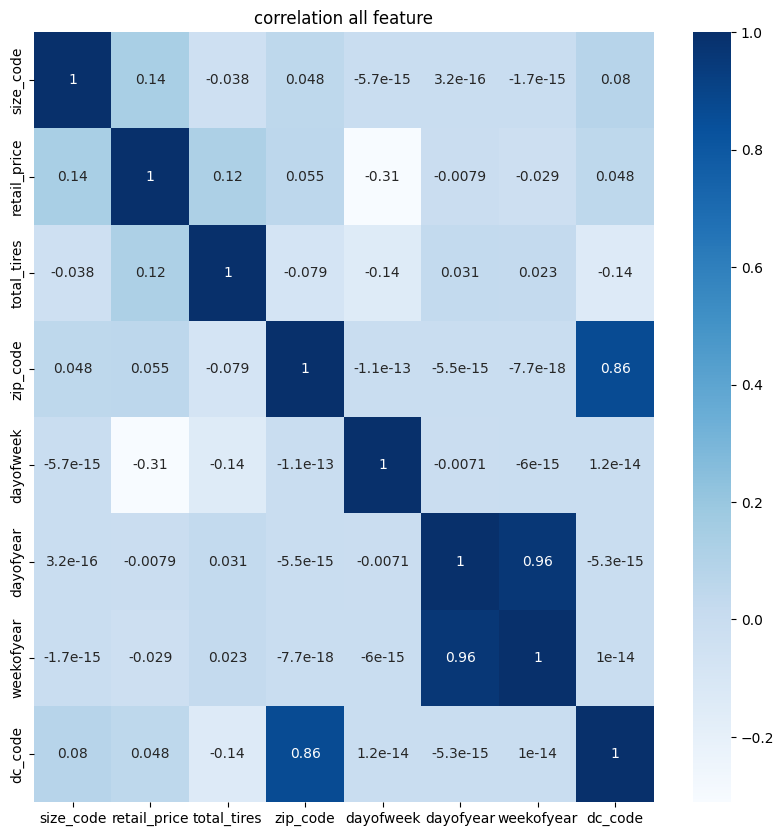

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
cor = data_plot.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.title("correlation all feature")
plt.show()

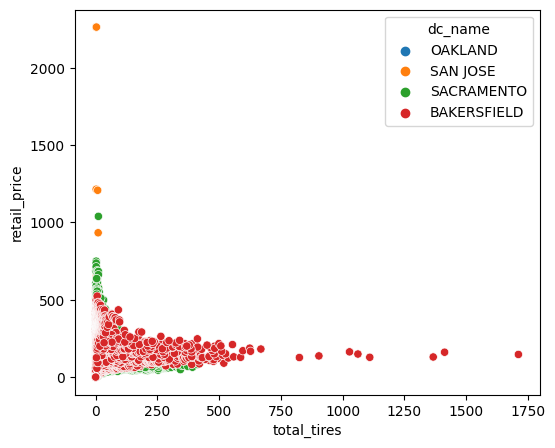

In [ ]:
import matplotlib.pyplot as plot
import seaborn as sns
plt.figure(figsize=(6,5))
sns.scatterplot(data=data_plot,x="total_tires",y="retail_price",hue="dc_name")
plt.show()

Text(0.5, 1.0, 'Spread of Total Tiers w/o Outliers')

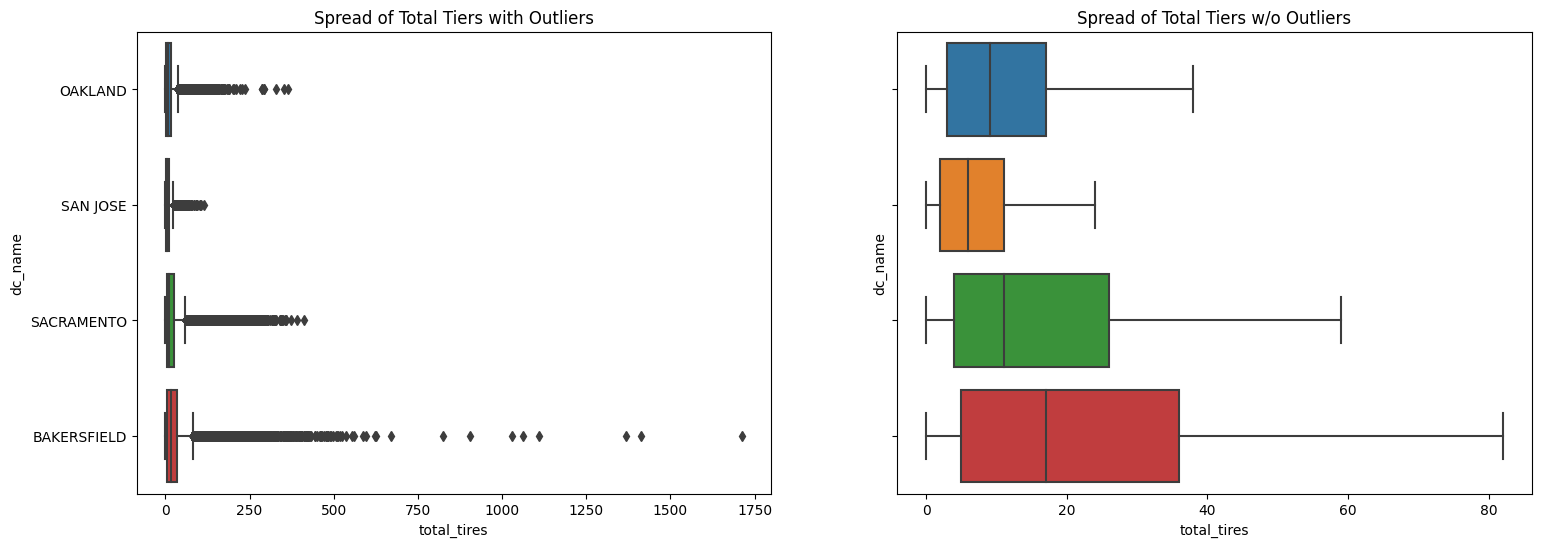

In [ ]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(1,2, figsize=(18,6), sharey=True)

sns.boxplot(data_plot,x='total_tires',y='dc_name', ax=ax[0])
sns.boxplot(data_plot,x='total_tires',y='dc_name', ax=ax[1], showfliers=False)
ax[0].set_title("Spread of Total Tiers with Outliers")
ax[1].set_title("Spread of Total Tiers w/o Outliers")



Text(0.5, 1.0, 'Spread of Retail Price w/o Outliers')

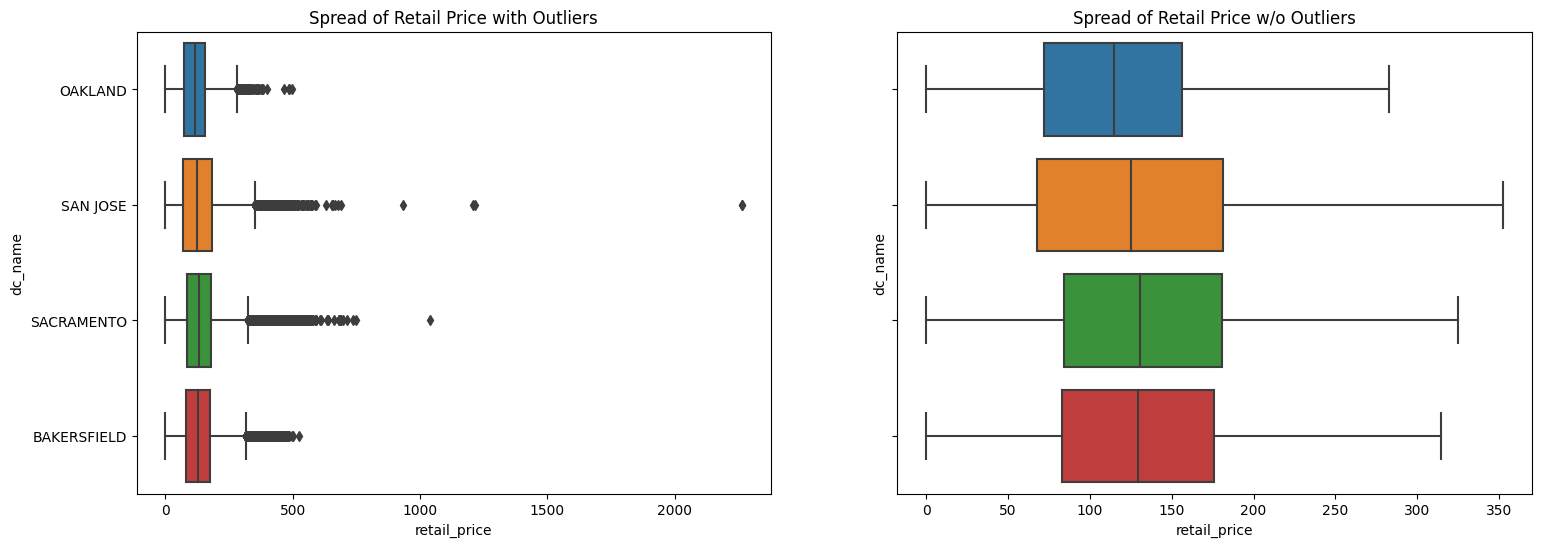

In [ ]:


fig, ax = plt.subplots(1,2, figsize=(18,6), sharey=True)

sns.boxplot(data_plot,x='retail_price',y='dc_name', ax=ax[0])
sns.boxplot(data_plot,x='retail_price',y='dc_name', ax=ax[1], showfliers=False)
ax[0].set_title("Spread of Retail Price with Outliers")
ax[1].set_title("Spread of Retail Price w/o Outliers")



In [ ]:
import plotly.express as px

x=pd.Timestamp('2020-03-01')
y=pd.Timestamp('2023-03-01')
temp_df = data_plot[(data_plot.date>=x) & (data_plot.date<=y)].sort_values(by='date')
fig = px.line(temp_df, x='date', y='retail_price',color='dc_name')
fig.show()

In [ ]:
fig = px.line(data_plot.query('size_code==2055516').sort_values(by='date'), x='date', y='retail_price',color='dc_name')
fig.show()

In [ ]:
fig = px.line(data_plot.query('size_code==2055516').sort_values(by='date'), x='date', y='total_tires',color='dc_name')
fig.show()

Text(0.5, 1.0, 'Day of the Week for Total Tiers w/o Outliers')

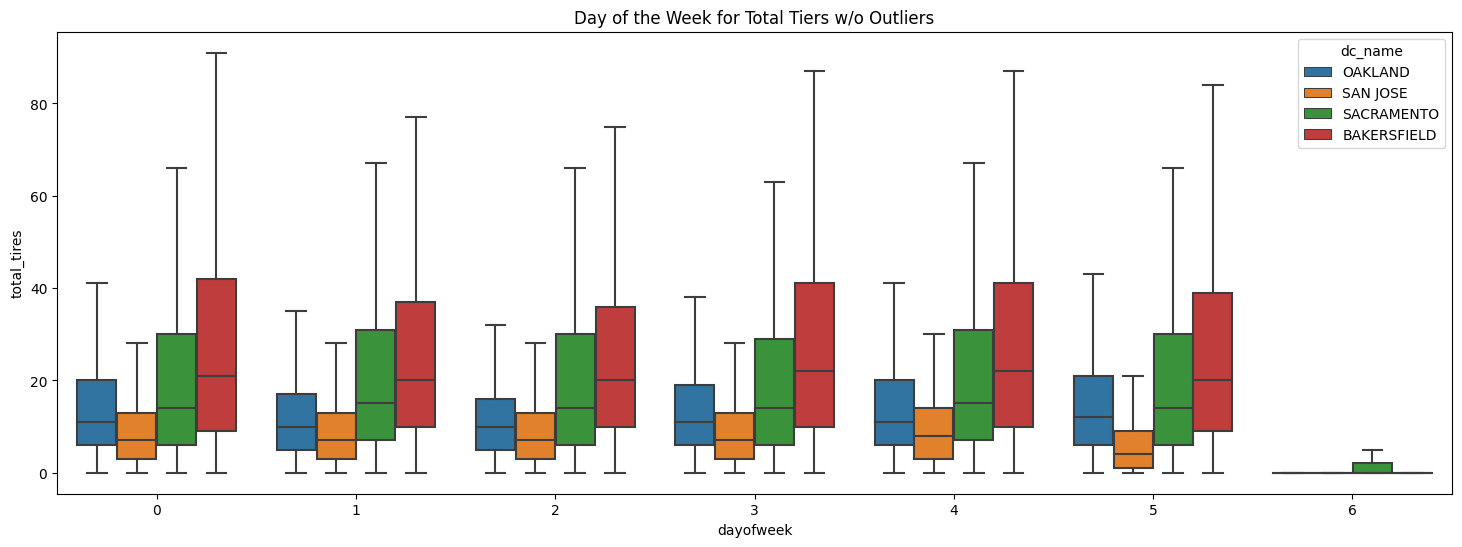

In [ ]:

fig, ax = plt.subplots(1,1, figsize=(18,6))
sns.boxplot(data_plot,y='total_tires',x='dayofweek', ax=ax, hue='dc_name',showfliers=False)
ax.set_title("Day of the Week for Total Tiers w/o Outliers")


In [ ]:


# holidays = pd.DataFrame({
#     'holiday' : 'events',
#     'ds' : pd.to_datetime(['2020-11-25','2021-11-25','2022-11-25',
#                           '2020-09-06','2021-09-06','2022-09-06',
#                           '2020-07-04','2021-07-04','2022-07-04',
#                           '2020-12-25','2021-12-25','2020-05-31',
#                           '2021-05-31','2022-05-31']),
#     'lower_window' : -2,
#     'upper_window': 5,
# })



In [ ]:
temp_list = data_main[['dc_name','size_code']]
unique_location_size = temp_list[~temp_list.duplicated(keep='first')]
unique_location_size = unique_location_size.reset_index()
unique_location_size.shape


(390, 3)

In [ ]:
data_main.dc_name.value_counts()

SACRAMENTO     113150
BAKERSFIELD     76650
OAKLAND         59860
SAN JOSE        35040
Name: dc_name, dtype: int64

In [ ]:
dc_data=data_plot[(data_plot['dc_name']=='SACRAMENTO') & (data_plot['size_code']==1756514) ]
dc_data.sort_values(by='date')

date     dc_name  size_code  retail_price  total_tires  zip_code  \
255981 2020-09-20  SACRAMENTO    1756514         0.000            0     95838   
76962  2020-09-21  SACRAMENTO    1756514        52.445           10     95838   
76548  2020-09-22  SACRAMENTO    1756514        79.910            2     95838   
255932 2020-09-23  SACRAMENTO    1756514         0.000            0     95838   
76763  2020-09-24  SACRAMENTO    1756514        73.570            5     95838   
...           ...         ...        ...           ...          ...       ...   
76526  2022-09-15  SACRAMENTO    1756514       105.900            1     95838   
76960  2022-09-16  SACRAMENTO    1756514       142.230           10     95838   
76570  2022-09-17  SACRAMENTO    1756514        63.900            2     95838   
255967 2022-09-18  SACRAMENTO    1756514         0.000            0     95838   
255888 2022-09-19  SACRAMENTO    1756514         0.000            0     95838   

        dayofweek  dayofyear  weekofyear  dc_code size_code_str  
255981          6        264          38        2       1756514  
76962           0        265          39        2       1756514  
76548           1        266          39        2       1756514  
255932          2        267          39        2       1756514  
76763           3        268          39        2       1756514  
...           ...        ...         ...      ...           ...  
76526           3        258          37        2       1756514  
76960           4        259          37        2       1756514  
76570           5        260          37        2       1756514  
255967          6        261          37        2       1756514  
255888          0        262          38        2       1756514  

[730 rows x 11 columns]

# **5-train and test split**

In [38]:
def fun_pre(pct, allvalues):
    absolute = int(pct / 100.*np.sum(allvalues))
    return "{:.1f}%\n({:d} )".format(pct, absolute)


def plot_pie(values,hlabels,uexplode=[0,0.1],my_color=["red","blue"]):
    plt.pie(values,
            labels =hlabels,
            explode=uexplode,
            colors=my_color,
            autopct = lambda pct: fun_pre(pct, values))
    plt.legend()
    plt.show()

In [39]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(data_candel_ma, lbl_candel,
                                                    test_size=0.20)

x_train_d, x_test_d, y_train, y_test = train_test_split(data_candel, lbl_candel,
                                                    test_size=0.20)

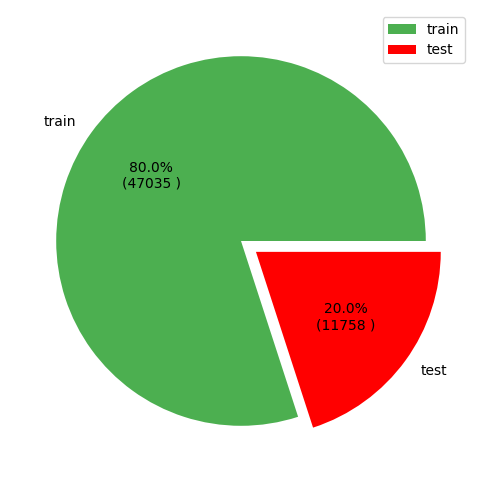

<Figure size 640x480 with 0 Axes>

In [40]:
import matplotlib.pyplot as plt
import numpy as np
hlabels=["train","test"]
mycolors = [ "#4CAF50","red","blue"]
class0=x_train.shape[0]
class1=x_test.shape[0]


values=[class0,class1]
plt.figure(figsize=(6,6))
plt.title("",fontsize=14)
plot_pie(values,hlabels,[0,0.1],mycolors)
plt.savefig("c.png",dpi=300)
plt.show()

# **6-Machine learing model**

In [41]:
result_array=[]
algorithm_name=[]

In [42]:
from sklearn import metrics
import math
from sklearn.neighbors import KNeighborsRegressor
regressor_model=KNeighborsRegressor(n_neighbors=500)

regressor_model.fit(x_train,y_train)
y_pred=regressor_model.predict(x_test)
model_final=regressor_model
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)
result_array.append([mse,rmse,mape,mae,r2])
algorithm_name.append(str(type(regressor_model)).split(".")[-1][:-2])


In [43]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0  KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946

In [44]:
from sklearn.ensemble import RandomForestRegressor
regressor_model=RandomForestRegressor(n_estimators=100,
                                      max_depth=1000, random_state=0)

regressor_model.fit(x_train,y_train)
y_pred=regressor_model.predict(x_test)
lbl_real=y_test
model_final=regressor_model

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)
result_array.append([mse,rmse,mape,mae,r2])
algorithm_name.append(str(type(regressor_model)).split(".")[-1][:-2])

In [45]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0    KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946
1  RandomForestRegressor  0.001986  0.044561  0.118448  0.029302 -0.040339

In [46]:
from sklearn.ensemble import GradientBoostingRegressor
regressor_model=GradientBoostingRegressor(random_state=0,learning_rate=0.9, n_estimators=500)

regressor_model.fit(x_train,y_train)
y_pred=regressor_model.predict(x_test)
lbl_real=y_test
model_final=regressor_model

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)
result_array.append([mse,rmse,mape,mae,r2])
algorithm_name.append(str(type(regressor_model)).split(".")[-1][:-2])

In [47]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0        KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946
1      RandomForestRegressor  0.001986  0.044561  0.118448  0.029302 -0.040339
2  GradientBoostingRegressor  0.002485  0.049847  0.126869  0.031614 -0.301756

#**7-GRU**

In [48]:
from tensorflow import keras
def Create_GRU(data):
  input_layer=keras.layers.Input(shape=(data.shape[1],data.shape[2]),name="input_layer")
  model=keras.models.Sequential([input_layer,
                                keras.layers.GRU(units=32,return_sequences=True),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dropout(0.1,name="drop1"),
                                keras.layers.GRU(units=64,return_sequences=True),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dropout(0.1,name="drop2"),
                                keras.layers.GRU(units=128),
                                keras.layers.Dense(512),
                                keras.layers.Dense(1,name="out_layer",activation="linear")

                                ]

                                )
  opti=keras.optimizers.Adam(learning_rate=0.00001)
  model.compile(optimizer=opti,loss="mse")
  return model
model_gru=Create_GRU(x_train_d)
model_gru.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 10, 32)            4032      
                                                                 
 batch_normalization (Batch  (None, 10, 32)            128       
 Normalization)                                                  
                                                                 
 drop1 (Dropout)             (None, 10, 32)            0         
                                                                 
 gru_1 (GRU)                 (None, 10, 64)            18816     
                                                                 
 batch_normalization_1 (Bat  (None, 10, 64)            256       
 chNormalization)                                                
                                                                 
 drop2 (Dropout)             (None, 10, 64)            0

In [49]:
hist_model_gru=model_gru.fit(x_train_d,
                               y_train,
                               epochs=200
                               ,batch_size=512,
                              validation_data=(x_test_d,y_test))

Epoch 1/200
92/92 [==============================] - 15s 21ms/step - loss: 0.0433 - val_loss: 0.0336
Epoch 2/200
92/92 [==============================] - 1s 13ms/step - loss: 0.0128 - val_loss: 0.0238
Epoch 3/200
92/92 [==============================] - 1s 13ms/step - loss: 0.0095 - val_loss: 0.0152
Epoch 4/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0079 - val_loss: 0.0072
Epoch 5/200
92/92 [==============================] - 1s 10ms/step - loss: 0.0066 - val_loss: 0.0034
Epoch 6/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0058 - val_loss: 0.0018
Epoch 7/200
92/92 [==============================] - 1s 10ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 8/200
92/92 [==============================] - 1s 10ms/step - loss: 0.0046 - val_loss: 0.0015
Epoch 9/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0042 - val_loss: 0.0015
Epoch 10/200
92/92 [==============================] - 1s 10ms/step - loss: 0.0038 - val_loss: 0.001

In [50]:
from sklearn import metrics
import math

print("_"*100)
print("----Metrics Test-------\n")
lbl_real=y_test
y_pred=model_gru.predict(x_test_d,batch_size=5000)
mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)
mse=np.round(mse,4);
rmse=np.round(rmse,4);
mae=np.round(mae,4);
r2=np.round(r2,4);
print("MSE GRU model: {0}".format(np.round(mse,4)))
print("RMSE GRU model: {0}".format(rmse))
print(" MAE GRU model: {0}".format(mae))
print("  R2 GRU model: {0}".format(r2))

result_array.append([mse,rmse,mape,mae,r2])
algorithm_name.append('GRU')

print("_"*100)

____________________________________________________________________________________________________
----Metrics Test-------

3/3 [==============================] - 1s 13ms/step
MSE GRU model: 0.0009
RMSE GRU model: 0.0304
 MAE GRU model: 0.0176
  R2 GRU model: 0.5171
____________________________________________________________________________________________________


In [51]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0        KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946
1      RandomForestRegressor  0.001986  0.044561  0.118448  0.029302 -0.040339
2  GradientBoostingRegressor  0.002485  0.049847  0.126869  0.031614 -0.301756
3                        GRU  0.000900  0.030400  0.126869  0.017600  0.517100

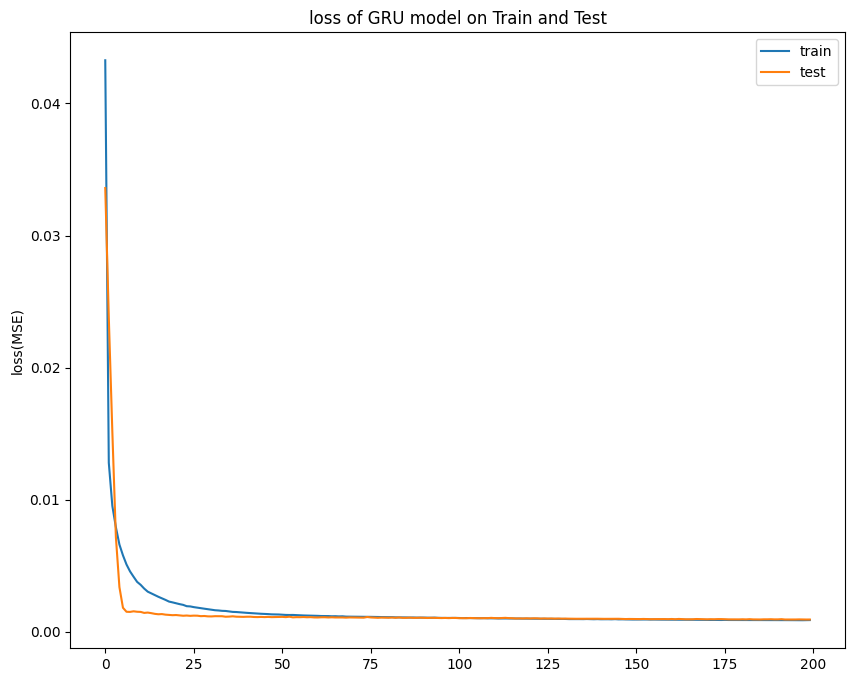

In [52]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
loss_train=hist_model_gru.history['loss']
loss_val=hist_model_gru.history['val_loss']
plt.plot(loss_train,label="train")
plt.plot(loss_val,label="test")
plt.legend()
plt.title("loss of GRU model on Train and Test")
plt.ylabel("loss(MSE)")
plt.show()

#**8-LSTM**

In [53]:
from tensorflow import keras
def Create_LSTM(data):
  input_layer=keras.layers.Input(shape=(data.shape[1],data.shape[2]),name="input_layer")
  model=keras.models.Sequential([input_layer,
                                keras.layers.LSTM(units=32,return_sequences=True),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dropout(0.1,name="drop1"),
                                keras.layers.LSTM(units=64,return_sequences=True),
                                keras.layers.BatchNormalization(),
                                keras.layers.Dropout(0.1,name="drop2"),
                                keras.layers.LSTM(units=128),
                                keras.layers.Dense(512),
                                keras.layers.Dense(1,name="out_layer",activation="linear")

                                ]

                                )
  opti=keras.optimizers.Adam(learning_rate=0.00001)
  model.compile(optimizer=opti,loss="mse")
  return model
model_lstm=Create_LSTM(x_train_d)
model_lstm.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 32)            5248      
                                                                 
 batch_normalization_2 (Bat  (None, 10, 32)            128       
 chNormalization)                                                
                                                                 
 drop1 (Dropout)             (None, 10, 32)            0         
                                                                 
 lstm_1 (LSTM)               (None, 10, 64)            24832     
                                                                 
 batch_normalization_3 (Bat  (None, 10, 64)            256       
 chNormalization)                                                
                                                                 
 drop2 (Dropout)             (None, 10, 64)           

In [54]:
hist_model_lstm=model_lstm.fit(x_train_d,
                               y_train,
                               epochs=200
                               ,batch_size=512,
                              validation_data=(x_test_d,y_test))

Epoch 1/200
92/92 [==============================] - 10s 22ms/step - loss: 0.0171 - val_loss: 0.0277
Epoch 2/200
92/92 [==============================] - 2s 17ms/step - loss: 0.0065 - val_loss: 0.0169
Epoch 3/200
92/92 [==============================] - 1s 15ms/step - loss: 0.0052 - val_loss: 0.0094
Epoch 4/200
92/92 [==============================] - 1s 12ms/step - loss: 0.0043 - val_loss: 0.0048
Epoch 5/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0038 - val_loss: 0.0027
Epoch 6/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0034 - val_loss: 0.0019
Epoch 7/200
92/92 [==============================] - 1s 12ms/step - loss: 0.0030 - val_loss: 0.0015
Epoch 8/200
92/92 [==============================] - 1s 12ms/step - loss: 0.0027 - val_loss: 0.0014
Epoch 9/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0026 - val_loss: 0.0014
Epoch 10/200
92/92 [==============================] - 1s 12ms/step - loss: 0.0024 - val_loss: 0.001

In [55]:
from sklearn import metrics
import math

print("_"*100)
print("----Metrics Test-------\n")
lbl_real=y_test
y_pred=model_lstm.predict(x_test_d,batch_size=5000)
mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)
mse=np.round(mse,4);
rmse=np.round(rmse,4);
mae=np.round(mae,4);
r2=np.round(r2,4);
print("MSE LSTM model: {0}".format(np.round(mse,4)))
print("RMSE LSTM model: {0}".format(rmse))
print(" MAE LSTM model: {0}".format(mae))
print("  R2 LSTM model: {0}".format(r2))

result_array.append([mse,rmse,mape,mae,r2])
algorithm_name.append('LSTM')

print("_"*100)

____________________________________________________________________________________________________
----Metrics Test-------

3/3 [==============================] - 1s 11ms/step
MSE LSTM model: 0.0009
RMSE LSTM model: 0.0301
 MAE LSTM model: 0.0179
  R2 LSTM model: 0.5263
____________________________________________________________________________________________________


In [56]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0        KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946
1      RandomForestRegressor  0.001986  0.044561  0.118448  0.029302 -0.040339
2  GradientBoostingRegressor  0.002485  0.049847  0.126869  0.031614 -0.301756
3                        GRU  0.000900  0.030400  0.126869  0.017600  0.517100
4                       LSTM  0.000900  0.030100  0.126869  0.017900  0.526300

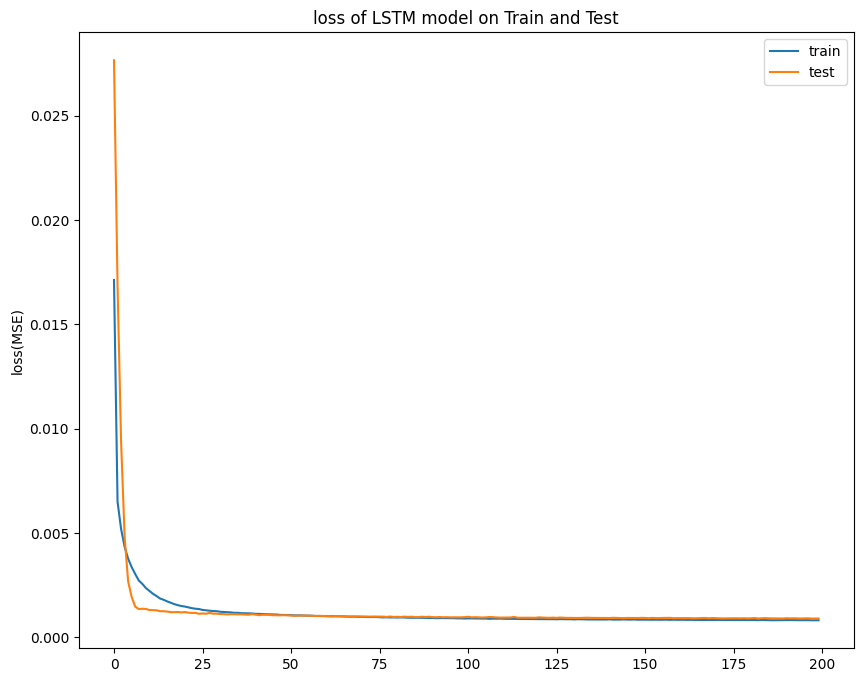

In [57]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
loss_train=hist_model_lstm.history['loss']
loss_val=hist_model_lstm.history['val_loss']
plt.plot(loss_train,label="train")
plt.plot(loss_val,label="test")
plt.legend()
plt.title("loss of LSTM model on Train and Test")
plt.ylabel("loss(MSE)")
plt.show()

# **9. CNN**

In [58]:
from tensorflow import keras
def create_CNN_model(data):
  initializer =keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=1420)
  input_layer=keras.layers.Input(shape=data.shape[1:],name="input_layer")

  # ---------Block 1-------
  x = keras.layers.Conv1D(filters=32, kernel_size=2,
                          padding='same',
                          name='conv1.1')(input_layer)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  x= keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D_1")(x)

 # ---------Block 2-------
  x = keras.layers.Conv1D(filters=64, kernel_size=2,
                          padding='same',
                          name='conv1.2')(x)

  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  x= keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D_2")(x)


  # ---------Block 3-------
  x = keras.layers.Conv1D(filters=128, kernel_size=2,
                          padding='same',
                          name='conv2.1')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)

  x= keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D_3")(x)


  #____________________________________________________________
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(512, activation='relu',name='dense_last')(x)
  output = keras.layers.Dense(1,activation="linear")(x)
  model = keras.Model(inputs=input_layer, outputs=output)
  opti = keras.optimizers.Adam(learning_rate=0.00001)
  model.compile(optimizer=opti,loss="mse")
  return model


In [59]:
CNN_model=create_CNN_model(x_train_d)
CNN_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10, 8)]           0         
                                                                 
 conv1.1 (Conv1D)            (None, 10, 32)            544       
                                                                 
 batch_normalization_4 (Bat  (None, 10, 32)            128       
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 10, 32)            0         
                                                                 
 MaxPooling1D_1 (MaxPooling  (None, 5, 32)             0         
 1D)                                                             
                                                                 
 conv1.2 (Conv1D)            (None, 5, 64)             4160  

In [60]:
n_samples_train=x_train.shape[0]

hist_model_cnn=CNN_model.fit(x_train_d,y_train,
                       shuffle=True,
                       batch_size=512,
                       epochs=200,
                       validation_data=(x_test_d,y_test))

Epoch 1/200
92/92 [==============================] - 9s 12ms/step - loss: 0.3685 - val_loss: 0.0861
Epoch 2/200
92/92 [==============================] - 1s 8ms/step - loss: 0.0549 - val_loss: 0.0666
Epoch 3/200
92/92 [==============================] - 1s 7ms/step - loss: 0.0277 - val_loss: 0.0282
Epoch 4/200
92/92 [==============================] - 1s 8ms/step - loss: 0.0188 - val_loss: 0.0146
Epoch 5/200
92/92 [==============================] - 1s 8ms/step - loss: 0.0147 - val_loss: 0.0125
Epoch 6/200
92/92 [==============================] - 1s 8ms/step - loss: 0.0122 - val_loss: 0.0107
Epoch 7/200
92/92 [==============================] - 1s 8ms/step - loss: 0.0106 - val_loss: 0.0095
Epoch 8/200
92/92 [==============================] - 1s 9ms/step - loss: 0.0094 - val_loss: 0.0087
Epoch 9/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0085 - val_loss: 0.0081
Epoch 10/200
92/92 [==============================] - 1s 11ms/step - loss: 0.0078 - val_loss: 0.0075
Epoch 

In [61]:
y_pred=CNN_model.predict(x_test_d,batch_size=512)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)
result_array.append([mse,rmse,mape,mae,r2])
algorithm_name.append('CNN')
print('-'*50)
print('mse  : {}'.format(mse))
print('rmse  : {}'.format(rmse))
print('mape  :  {}'.format(mape))
print('mae  :  {}'.format(mae))
print('r2  :  {}'.format(r2))
print('-'*50)

23/23 [==============================] - 0s 4ms/step
--------------------------------------------------
mse  : 0.0010406463135603403
rmse  : 0.032259050103193375
mape  :  0.08372294940460824
mae  :  0.020682234291343343
r2  :  0.45479294650302426
--------------------------------------------------


In [62]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0        KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946
1      RandomForestRegressor  0.001986  0.044561  0.118448  0.029302 -0.040339
2  GradientBoostingRegressor  0.002485  0.049847  0.126869  0.031614 -0.301756
3                        GRU  0.000900  0.030400  0.126869  0.017600  0.517100
4                       LSTM  0.000900  0.030100  0.126869  0.017900  0.526300
5                        CNN  0.001041  0.032259  0.083723  0.020682  0.454793

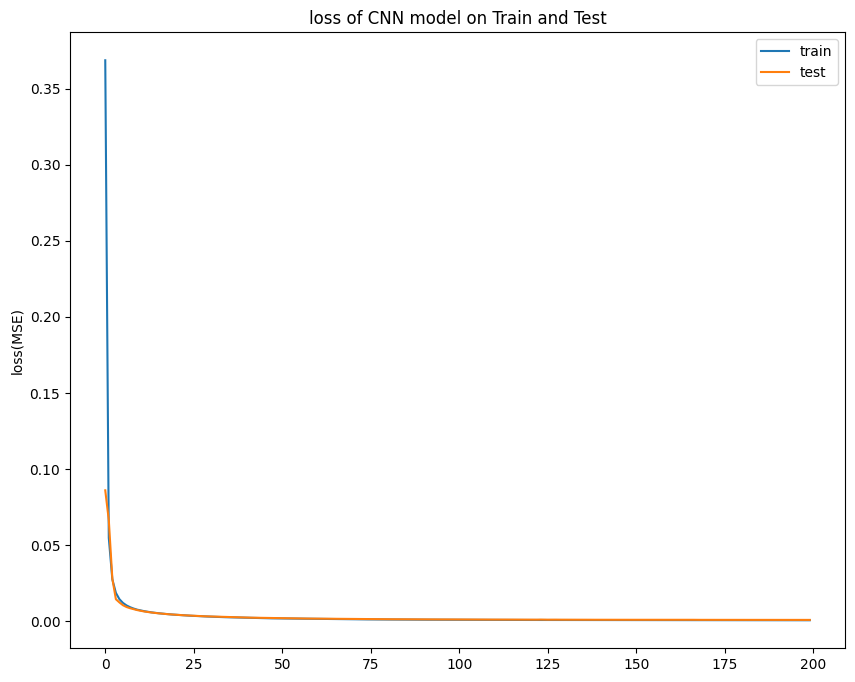

In [63]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
loss_train=hist_model_cnn.history['loss']
loss_val=hist_model_cnn.history['val_loss']
plt.plot(loss_train,label="train")
plt.plot(loss_val,label="test")
plt.legend()
plt.title("loss of CNN model on Train and Test")
plt.ylabel("loss(MSE)")
plt.show()

# **10. CNNLSTM**

In [64]:
from sklearn import metrics

In [65]:
from tensorflow import keras
def create_CNNLSTM_model(data):
  initializer =keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=1420)
  input_layer=keras.layers.Input(shape=data.shape[1:],name="input_layer")

  # ---------Block 1-------
  x = keras.layers.Conv1D(filters=128, kernel_size=7,
                          padding='same',
                          name='conv1.1')(input_layer)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)
  x = keras.layers.Conv1D(filters=128, kernel_size=2,
                          padding='same',
                          name='conv2.1')(x)
  x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)

 # ---------Block 3-------
  x=keras.layers.LSTM(units=32,return_sequences=True)(x)
  # x = keras.layers.BatchNormalization()(x)
  x = keras.layers.Activation('relu')(x)


  #____________________________________________________________
  x = keras.layers.Flatten()(x)
  x = keras.layers.Dense(512, activation='relu',name='dense_last')(x)
  output = keras.layers.Dense(1,activation="linear")(x)
  model = keras.Model(inputs=input_layer, outputs=output)
  optimizer = keras.optimizers.Adam(learning_rate=0.00001) #,epsilon=1e-1,beta_1=0.9,beta_2=0.99
  model.compile(loss="mse",
                    optimizer=optimizer,)
  return model


In [66]:
CNNLSTM_model=create_CNNLSTM_model(x_train_d)
CNNLSTM_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 10, 8)]           0         
                                                                 
 conv1.1 (Conv1D)            (None, 10, 128)           7296      
                                                                 
 batch_normalization_7 (Bat  (None, 10, 128)           512       
 chNormalization)                                                
                                                                 
 activation_3 (Activation)   (None, 10, 128)           0         
                                                                 
 conv2.1 (Conv1D)            (None, 10, 128)           32896     
                                                                 
 batch_normalization_8 (Bat  (None, 10, 128)           512       
 chNormalization)                                          

In [67]:
n_samples_train=x_train.shape[0]

hist_model_cnnlstm=CNNLSTM_model.fit(x_train_d,y_train,
                       shuffle=True,
                       batch_size=1000,
                       epochs=200,
                       validation_data=(x_test_d,y_test))

Epoch 1/200
48/48 [==============================] - 5s 23ms/step - loss: 0.0492 - val_loss: 0.0353
Epoch 2/200
48/48 [==============================] - 0s 10ms/step - loss: 0.0045 - val_loss: 0.0133
Epoch 3/200
48/48 [==============================] - 0s 10ms/step - loss: 0.0029 - val_loss: 0.0063
Epoch 4/200
48/48 [==============================] - 0s 10ms/step - loss: 0.0025 - val_loss: 0.0039
Epoch 5/200
48/48 [==============================] - 0s 9ms/step - loss: 0.0023 - val_loss: 0.0030
Epoch 6/200
48/48 [==============================] - 0s 9ms/step - loss: 0.0021 - val_loss: 0.0028
Epoch 7/200
48/48 [==============================] - 0s 9ms/step - loss: 0.0020 - val_loss: 0.0029
Epoch 8/200
48/48 [==============================] - 0s 10ms/step - loss: 0.0019 - val_loss: 0.0029
Epoch 9/200
48/48 [==============================] - 0s 9ms/step - loss: 0.0018 - val_loss: 0.0028
Epoch 10/200
48/48 [==============================] - 0s 10ms/step - loss: 0.0017 - val_loss: 0.0026
Epo

In [68]:
y_pred=CNNLSTM_model.predict(x_test_d,batch_size=512)
lbl_real=y_test

mse=metrics.mean_squared_error(lbl_real, y_pred)
rmse = math.sqrt(mse)
mape=metrics.mean_absolute_percentage_error(lbl_real, y_pred)
mae=metrics.mean_absolute_error(lbl_real,y_pred)
r2= metrics.r2_score(lbl_real, y_pred)
result_array.append([mse,rmse,mape,mae,r2])
algorithm_name.append('CNNLSTM')
print('-'*50)
print('mse  : {}'.format(mse))
print('rmse  : {}'.format(rmse))
print('mape  :  {}'.format(mape))
print('mae  :  {}'.format(mae))
print('r2  :  {}'.format(r2))
print('-'*50)

23/23 [==============================] - 1s 6ms/step
--------------------------------------------------
mse  : 0.0008667226078418654
rmse  : 0.029440152986047227
mape  :  0.07387928664936673
mae  :  0.018256392946443756
r2  :  0.5459136566736336
--------------------------------------------------


In [69]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0        KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946
1      RandomForestRegressor  0.001986  0.044561  0.118448  0.029302 -0.040339
2  GradientBoostingRegressor  0.002485  0.049847  0.126869  0.031614 -0.301756
3                        GRU  0.000900  0.030400  0.126869  0.017600  0.517100
4                       LSTM  0.000900  0.030100  0.126869  0.017900  0.526300
5                        CNN  0.001041  0.032259  0.083723  0.020682  0.454793
6                    CNNLSTM  0.000867  0.029440  0.073879  0.018256  0.545914

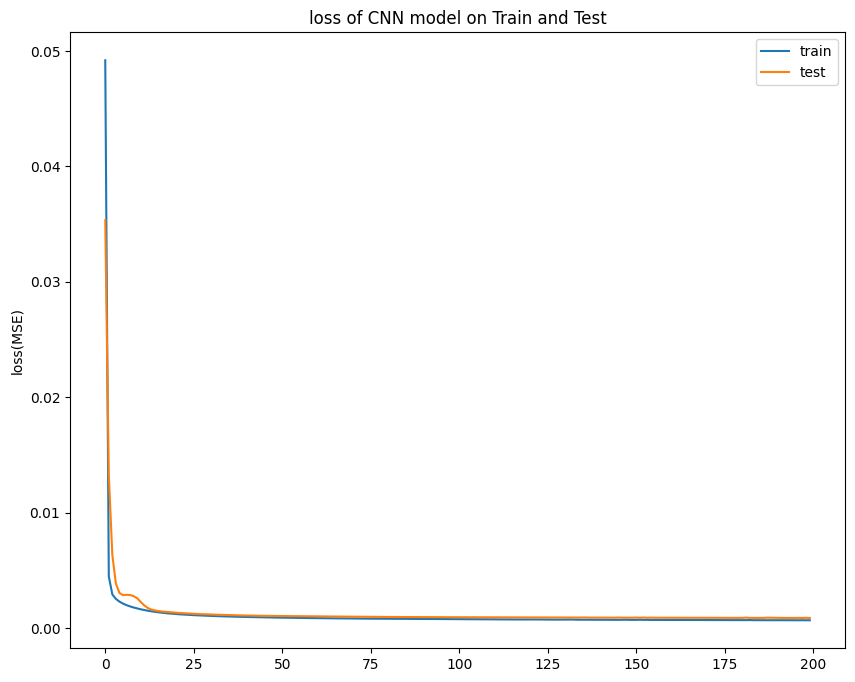

In [70]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,8))
loss_train=hist_model_cnnlstm.history['loss']
loss_val=hist_model_cnnlstm.history['val_loss']
plt.plot(loss_train,label="train")
plt.plot(loss_val,label="test")
plt.legend()
plt.title("loss of CNN model on Train and Test")
plt.ylabel("loss(MSE)")
plt.show()

# **11. result**

In [71]:
data_res=pd.DataFrame(result_array,columns=["MSE","RMSE","MAPE","MAE","R2"])
data_res["Algorithm"]=algorithm_name
data_res=data_res[["Algorithm","MSE","RMSE","MAPE","MAE","R2"]]
data_res

Algorithm       MSE      RMSE      MAPE       MAE        R2
0        KNeighborsRegressor  0.001912  0.043731  0.110772  0.027826 -0.001946
1      RandomForestRegressor  0.001986  0.044561  0.118448  0.029302 -0.040339
2  GradientBoostingRegressor  0.002485  0.049847  0.126869  0.031614 -0.301756
3                        GRU  0.000900  0.030400  0.126869  0.017600  0.517100
4                       LSTM  0.000900  0.030100  0.126869  0.017900  0.526300
5                        CNN  0.001041  0.032259  0.083723  0.020682  0.454793
6                    CNNLSTM  0.000867  0.029440  0.073879  0.018256  0.545914

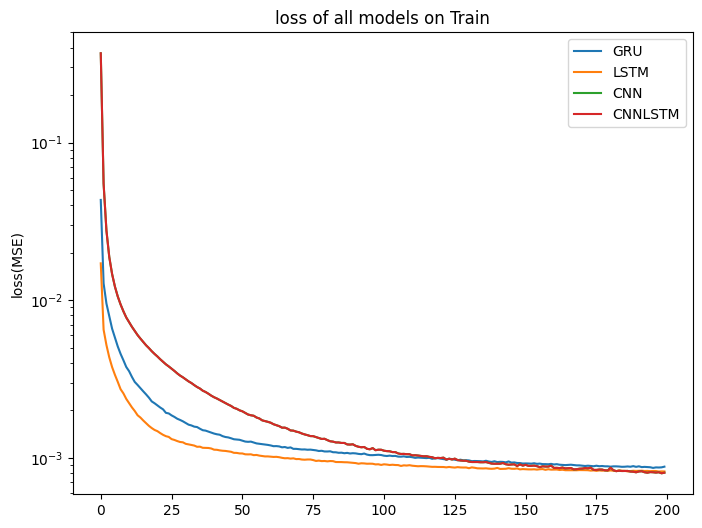

In [72]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
loss_train1=hist_model_gru.history['loss']
loss_train2=hist_model_lstm.history['loss']
loss_train3=hist_model_cnn.history['loss']
loss_train4=hist_model_cnnlstm.history['loss']




plt.semilogy(loss_train1,label="GRU")
plt.semilogy(loss_train2,label="LSTM")
plt.semilogy(loss_train3,label="CNN")
plt.semilogy(loss_train3,label="CNNLSTM")
plt.legend()
plt.title("loss of all models on Train")
plt.ylabel("loss(MSE)")
plt.show()

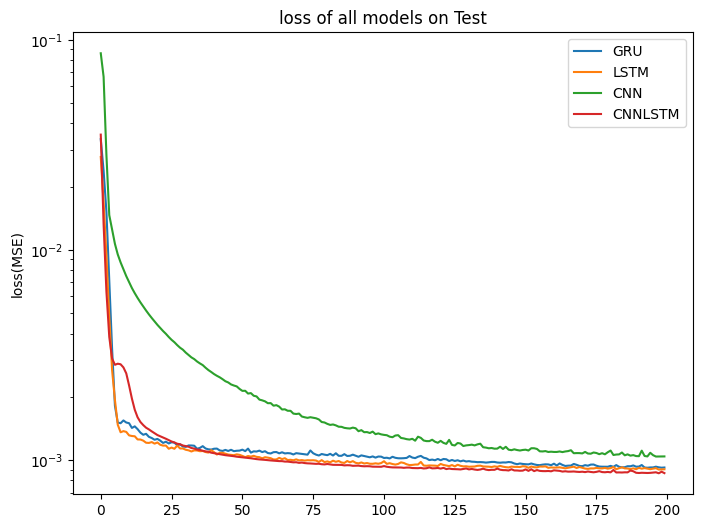

In [73]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
loss_1=hist_model_gru.history['val_loss']
loss_2=hist_model_lstm.history['val_loss']
loss_3=hist_model_cnn.history['val_loss']
loss_4=hist_model_cnnlstm.history['val_loss']



plt.semilogy(loss_1,label="GRU")
plt.semilogy(loss_2,label="LSTM")
plt.semilogy(loss_3,label="CNN")
plt.semilogy(loss_4,label="CNNLSTM")
plt.legend()
plt.title("loss of all models on Test")
plt.ylabel("loss(MSE)")
plt.show()

In [74]:
data_res.to_excel('data_res1.xlsx')